# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kamrannaseer","key":"86bfee909777b6a9a32c48d76ca589d5"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d codeaesthete/compressive-strength-of-concrete

  0% 0.00/11.2k [00:00<?, ?B/s]
100% 11.2k/11.2k [00:00<00:00, 19.2MB/s]


In [7]:
!mkdir compressive-strength-of-concrete

In [8]:
! unzip compressive-strength-of-concrete.zip -d compressive-strength-of-concrete

Archive:  compressive-strength-of-concrete.zip
  inflating: compressive-strength-of-concrete/compresive_strength_concrete.csv  


In [9]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder
import scipy
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from keras.wrappers.scikit_learn import KerasRegressor

In [158]:
data = pd.read_csv("/content/compressive-strength-of-concrete/compresive_strength_concrete.csv")
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [136]:
data.shape

(1030, 9)

In [133]:
int(data.shape[0]/6)

171

In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Age (day)                                              1030 non-null   float64
 1   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 2   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 3   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 4   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 5   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 6   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 7   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 8   Concrete compressive strength(MPa, megapascals)  

In [155]:
data.isnull().sum()

Age (day)                                                0
Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [16]:
# data.drop(["car_ID"], axis="columns", inplace=True)

In [159]:
lb_make = LabelEncoder()

In [15]:
# cate_df_object = data.select_dtypes(include=['object']).copy()
# for i in cate_df_object:
#   cate_df_object[i] = lb_make.fit_transform(cate_df_object[i])
# cate_df_object.head()

In [160]:
cate_df_int = data.select_dtypes(include=['int64']).copy()
for i in cate_df_int:
  cate_df_int[i]=(cate_df_int[i]-cate_df_int[i].min())/(cate_df_int[i].max()-cate_df_int[i].min())
cate_df_int.head()

,Age (day)
0,0.074176
1,0.074176
2,0.739011
3,1.000000
4,0.986264


In [161]:
cate_df_float = data.select_dtypes(include=['float64']).copy()
for i in cate_df_float:
  cate_df_float[i]=(cate_df_float[i]-cate_df_float[i].min())/(cate_df_float[i].max()-cate_df_float[i].min())
cate_df_float.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),"Concrete compressive strength(MPa, megapascals)"
0,1.000000,0.000000,0.0,0.321086,0.07764,0.694767,0.205720,0.967485
1,1.000000,0.000000,0.0,0.321086,0.07764,0.738372,0.205720,0.741996
2,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,0.472655
3,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,0.482372
4,0.220548,0.368392,0.0,0.560703,0.00000,0.515698,0.580783,0.522860


In [162]:
# data = cate_df_object.join(cate_df_int)
data = cate_df_int.join(cate_df_float)
data.head()

,Age (day),Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),"Concrete compressive strength(MPa, megapascals)"
0,0.074176,1.000000,0.000000,0.0,0.321086,0.07764,0.694767,0.205720,0.967485
1,0.074176,1.000000,0.000000,0.0,0.321086,0.07764,0.738372,0.205720,0.741996
2,0.739011,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,0.472655
3,1.000000,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,0.482372
4,0.986264,0.220548,0.368392,0.0,0.560703,0.00000,0.515698,0.580783,0.522860


In [143]:
data.columns

Index(['Age (day)', 'Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [163]:
dependent_vars = data["Concrete compressive strength(MPa, megapascals) "]

In [145]:
dependent_vars

0       0.967485
1       0.741996
2       0.472655
3       0.482372
4       0.522860
          ...   
1025    0.522611
1026    0.359412
1027    0.266226
1028    0.379220
1029    0.374611
Name: Concrete compressive strength(MPa, megapascals) , Length: 1030, dtype: float64

In [164]:
independent_vars = data.drop("Concrete compressive strength(MPa, megapascals) ",axis=1)

In [147]:
independent_vars

,Age (day),Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture)
0,0.074176,1.000000,0.000000,0.000000,0.321086,0.077640,0.694767,0.205720
1,0.074176,1.000000,0.000000,0.000000,0.321086,0.077640,0.738372,0.205720
2,0.739011,0.526256,0.396494,0.000000,0.848243,0.000000,0.380814,0.000000
3,1.000000,0.526256,0.396494,0.000000,0.848243,0.000000,0.380814,0.000000
4,0.986264,0.220548,0.368392,0.000000,0.560703,0.000000,0.515698,0.580783
...,...,...,...,...,...,...,...,...
1025,0.074176,0.398174,0.322760,0.451274,0.461661,0.276398,0.200872,0.437280
1026,0.074176,0.502740,0.000000,0.577711,0.592652,0.322981,0.049128,0.550426
1027,0.074176,0.106164,0.387869,0.542729,0.566294,0.189441,0.265698,0.466633
1028,0.074176,0.130365,0.519477,0.000000,0.429712,0.350932,0.548256,0.488961


In [165]:
X_train, X_test, y_train, y_test = train_test_split(independent_vars, dependent_vars, test_size=0.50)
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.40)

In [172]:
model = Sequential()
model.add(Dense(50, input_dim=independent_vars.shape[1], activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1,))
model.compile(loss='mse', optimizer='adam', metrics=["mae"])

In [173]:
history = model.fit(X_train, y_train, epochs=70, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/70
17/17 [==============================] - 1s 15ms/step - loss: 0.1691 - mae: 0.3534 - val_loss: 0.0777 - val_mae: 0.2100
Epoch 2/70
17/17 [==============================] - 0s 5ms/step - loss: 0.0577 - mae: 0.1860 - val_loss: 0.0525 - val_mae: 0.1912
Epoch 3/70
17/17 [==============================] - 0s 5ms/step - loss: 0.0386 - mae: 0.1581 - val_loss: 0.0472 - val_mae: 0.1817
Epoch 4/70
17/17 [==============================] - 0s 5ms/step - loss: 0.0359 - mae: 0.1502 - val_loss: 0.0399 - val_mae: 0.1629
Epoch 5/70
17/17 [==============================] - 0s 5ms/step - loss: 0.0314 - mae: 0.1379 - val_loss: 0.0339 - val_mae: 0.1531
Epoch 6/70
17/17 [==============================] - 0s 5ms/step - loss: 0.0242 - mae: 0.1253 - val_loss: 0.0280 - val_mae: 0.1415
Epoch 7/70
17/17 [==============================] - 0s 5ms/step - loss: 0.0196 - mae: 0.1125 - val_loss: 0.0224 - val_mae: 0.1236
Epoch 8/70
17/17 [==============================] - 0s 5ms/step - loss: 0.0203 - mae: 0.1

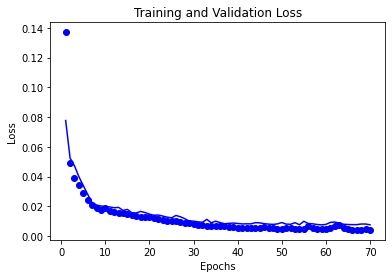

In [174]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, "bo", label="Trainig Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

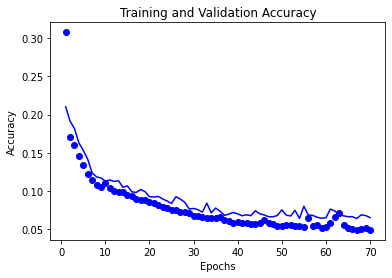

In [175]:
accuracy = history.history["mae"]
val_accuracy = history.history["val_mae"]
epochs = range(1, len(accuracy)+1)

plt.plot(epochs, accuracy, "bo", label="Trainig Accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [176]:
y_pred = model.predict(X_test)

In [177]:
score = mean_squared_error(y_test, y_pred)
score

0.005726613497892655

In [178]:
np.sqrt(score)

0.07567439129515781

In [179]:
print(model.evaluate(X_test,y_test))

10/10 [==============================] - 0s 2ms/step - loss: 0.0057 - mae: 0.0579
[0.005726613570004702, 0.05794883146882057]


In [189]:
score = []

K_fold_no = 10
K_fold_no_batch_size = int(data.shape[0]/K_fold_no)

def make_model():
  model = Sequential()
  model.add(Dense(50, input_dim=independent_vars.shape[1], activation='relu'))
  model.add(Dense(32, activation='relu'))
  # model.add(Dense(12, activation='relu'))
  model.add(Dense(1,))
  model.compile(loss='mse', optimizer='adam', metrics=["mae"])
  return model

for i in range(K_fold_no):

  print(f"KFOLD NO. {i}")

  X_test = independent_vars[i*K_fold_no_batch_size : (i+1)*K_fold_no_batch_size]
  y_test = dependent_vars[i*K_fold_no_batch_size : (i+1)*K_fold_no_batch_size]

  X_train = np.concatenate(
      [independent_vars[:i*K_fold_no_batch_size],
      independent_vars[(i+1)*K_fold_no_batch_size:]],
      axis=0
  )
  y_train = np.concatenate(
    [dependent_vars[:i*K_fold_no_batch_size],
    dependent_vars[(i+1)*K_fold_no_batch_size:]],
    axis=0
  )

  model = make_model()

  model.fit(X_train, y_train, epochs=60, verbose=0)

  mse, mae = model.evaluate(X_test,y_test)

  score.append(mae)

print(score)

from statistics import mean

print("Average of the score =", round(mean(score), 2))

KFOLD NO. 0
4/4 [==============================] - 0s 3ms/step - loss: 0.0177 - mae: 0.1099
KFOLD NO. 1
4/4 [==============================] - 0s 3ms/step - loss: 0.0128 - mae: 0.0886
KFOLD NO. 2
4/4 [==============================] - 0s 4ms/step - loss: 0.0064 - mae: 0.0572
KFOLD NO. 3
4/4 [==============================] - 0s 4ms/step - loss: 0.0138 - mae: 0.0850
KFOLD NO. 4
4/4 [==============================] - 0s 4ms/step - loss: 0.0112 - mae: 0.0848
KFOLD NO. 5
4/4 [==============================] - 0s 3ms/step - loss: 0.0080 - mae: 0.0681
KFOLD NO. 6
4/4 [==============================] - 0s 3ms/step - loss: 0.0031 - mae: 0.0408
KFOLD NO. 7
4/4 [==============================] - 0s 3ms/step - loss: 0.0056 - mae: 0.0502
KFOLD NO. 8
4/4 [==============================] - 0s 3ms/step - loss: 0.0053 - mae: 0.0598
KFOLD NO. 9
4/4 [==============================] - 0s 3ms/step - loss: 0.0063 - mae: 0.0636
[0.10994255542755127, 0.08861587941646576, 0.057214949280023575, 0.0849786102771